# 获取三维点云的PCA平面

In [1]:
# 计算以下数据的协方差矩阵
import numpy as np
# 读取点云文件
file_path = 'point_cloud.txt'  # 替换为你的文件路径
point_cloud_data = np.loadtxt(file_path)
print(len(point_cloud_data))
# point_cloud_data = point_cloud_data[::10]
# print(len(point_cloud_data))
# 提取坐标和颜色信息
data = point_cloud_data[:, :3]
rgb_colors = point_cloud_data[:, 3:] / 255.0  # 将RGB颜色归一化到 [0, 1] 范围
# 中心化
data_normal = data-data.mean(0)
C = np.cov(data_normal.T)

#计算特征值和特征向量
vals, vecs = np.linalg.eig(C)
#重新排序，从大到小
vecs = vecs[:,np.argsort(-vals)]
vals = vals[np.argsort(-vals)]

vals,vecs

#数据在主成分1上的投影坐标是
zcf = np.matmul(data_normal,vecs[:,:2])
data_normal = np.matmul(data_normal,vecs[:,:3])
# data_ = np.matmul(zcf,vecs[:,:2].T)+data.mean(0)
# data_


138698


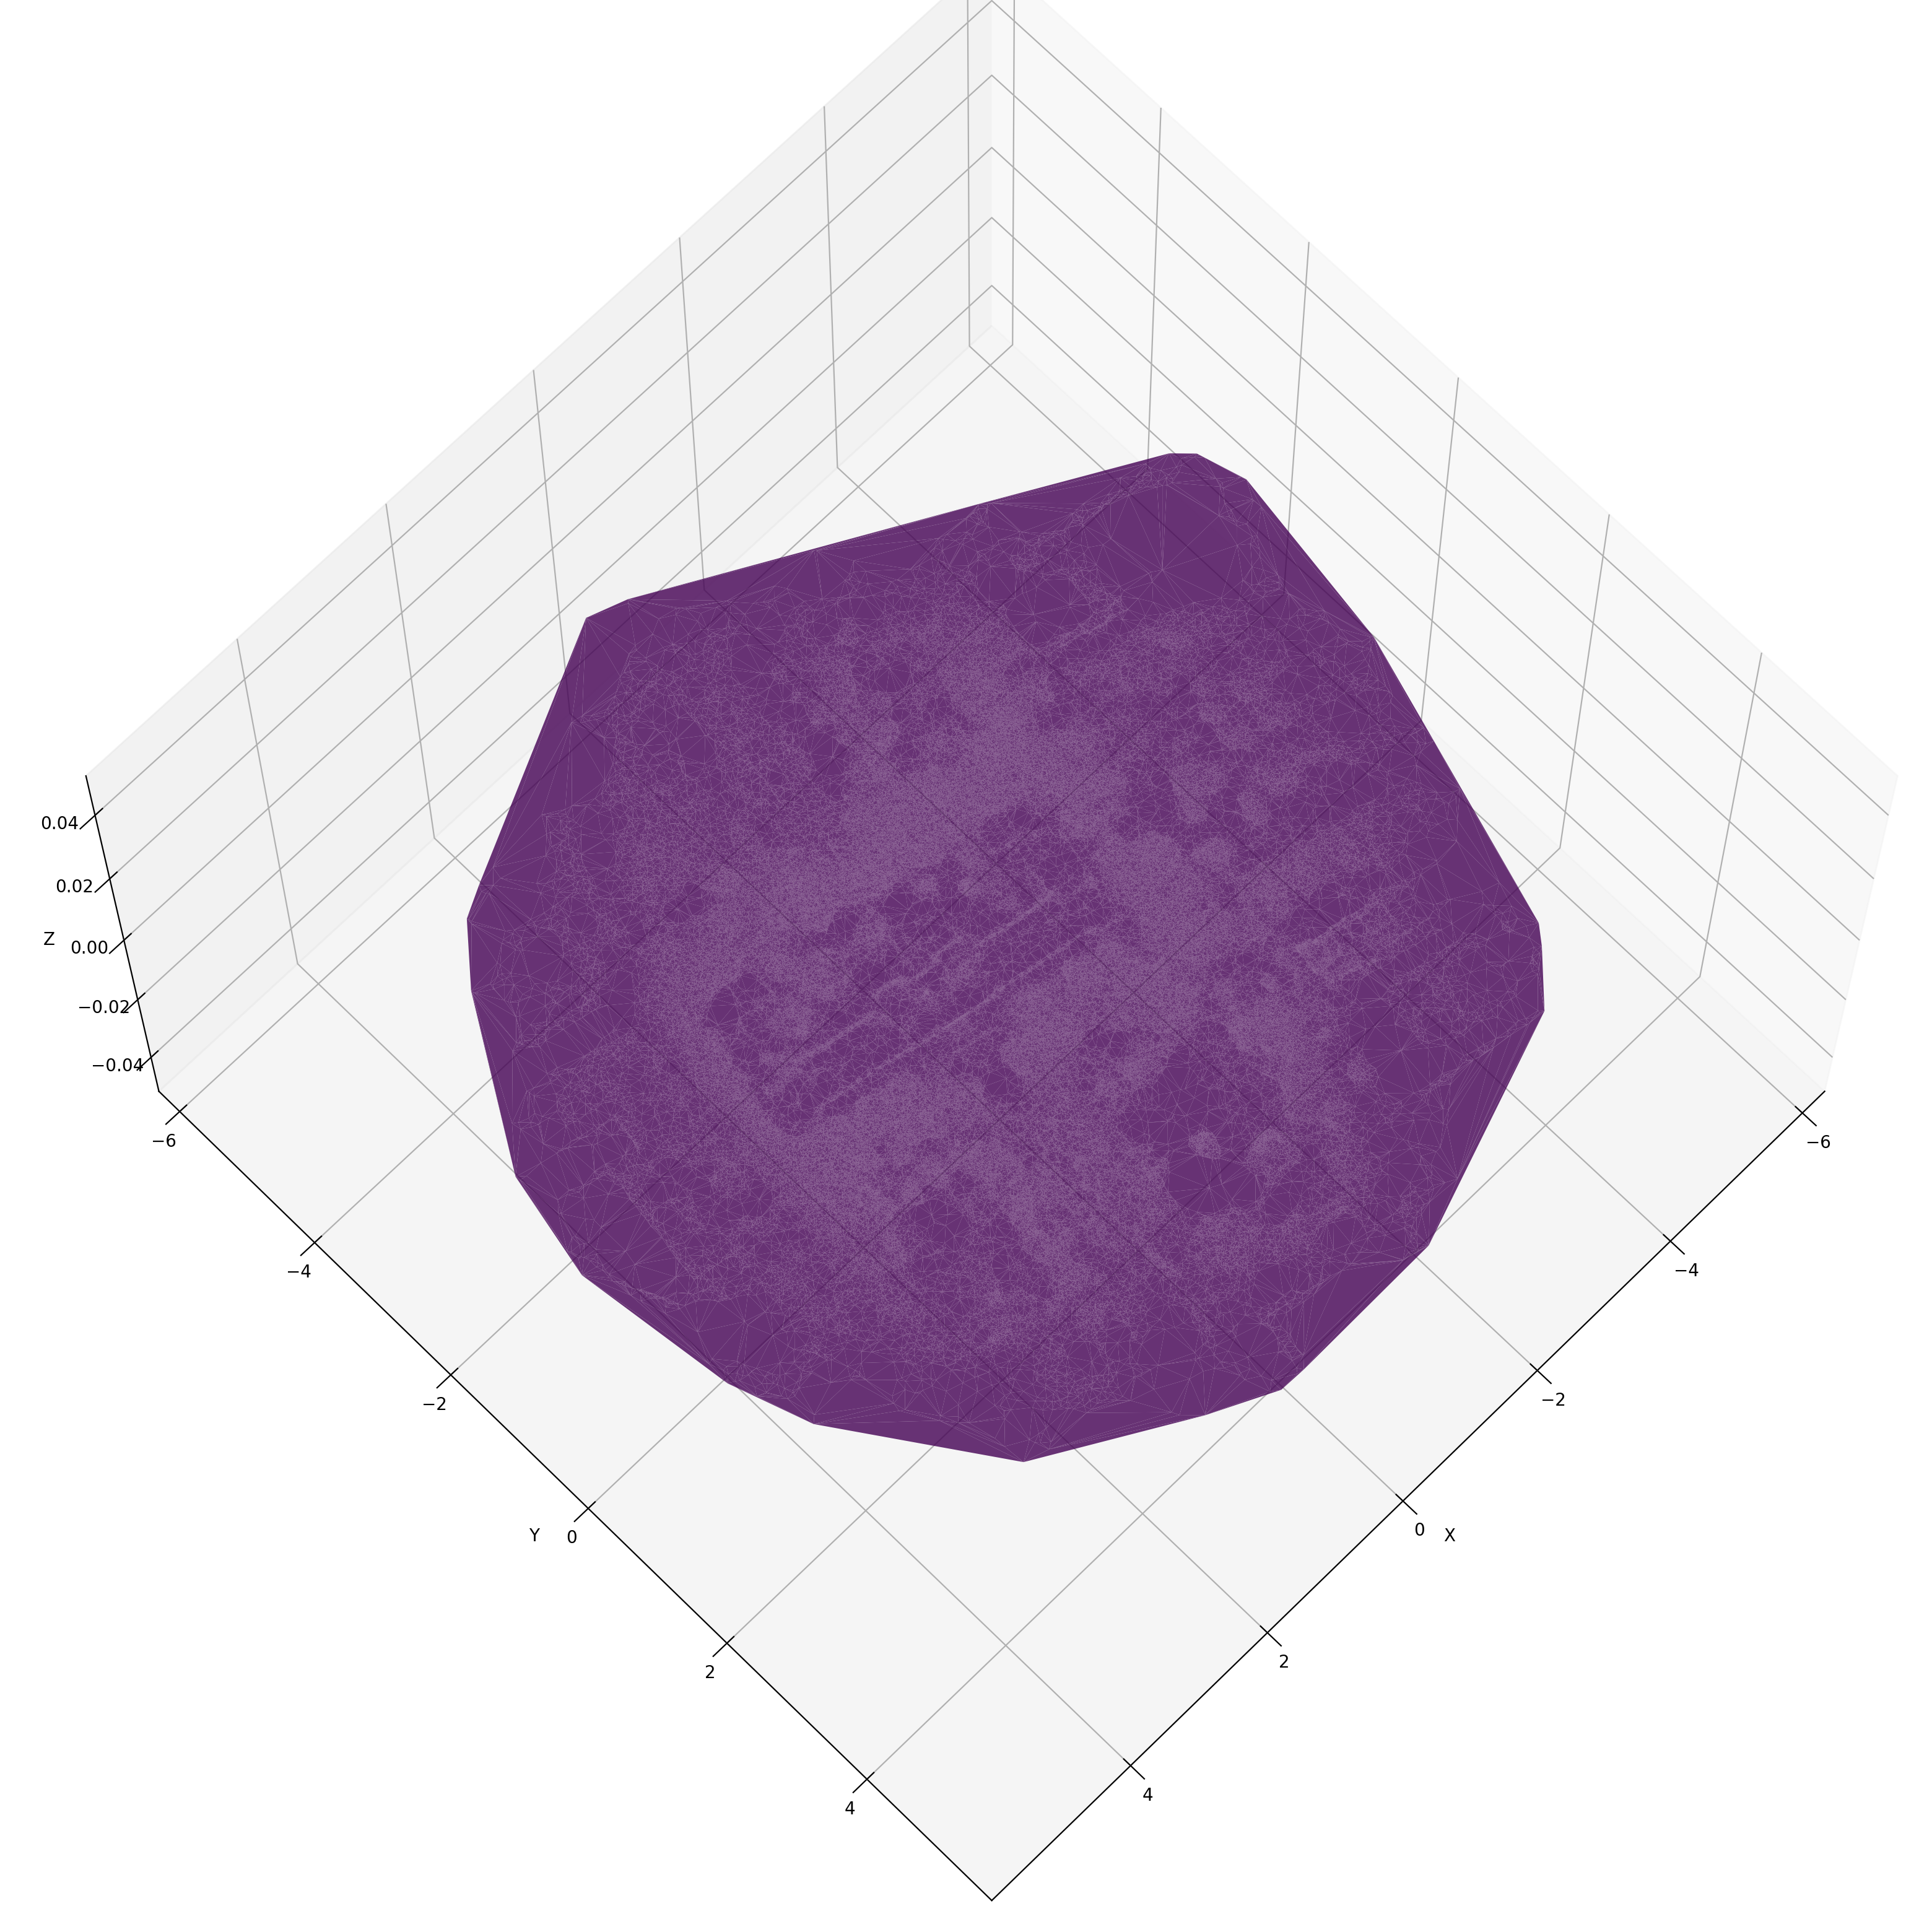

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 假设 data 是原始数据，zcf 是 PCA 投影的点坐标

azim_increment = 5
for i in range(70,75, azim_increment):
    # 创建一个图形
    fig = plt.figure(1,(20,20),dpi = 200)
    ax = fig.add_subplot(111, projection='3d')

    # 可视化原始数据
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], s=1, c=rgb_colors, marker='s', label='Original Data')
    ax.scatter(data_normal[:, 0], data_normal[:, 1], data_normal[:, 2], s=1, c=rgb_colors, marker='s', label='Original Data')

    # 可视化 PCA 投影点
    # ax.scatter(zcf[:, 0], zcf[:, 1], np.zeros_like(zcf[:, 0]), s=1,  c='red', marker='o', label='PCA Projection')
    # 生成平面上的点
    # zcf_plane = np.column_stack((zcf[:, 0], zcf[:, 1], np.zeros_like(zcf[:, 0])))

    # 绘制曲面
    # ax.plot_trisurf(zcf_plane[:, 0], zcf_plane[:, 1], zcf_plane[:, 2], cmap='viridis', alpha=0.8, label='PCA Plane')
    
    # ax.axis('off')
    ax.view_init(elev=i, azim=45)
    # 设置图形属性
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # ax.set_title('Original Data and PCA Projection')
    # ax.legend()
    
    # 如果目录不存在，则创建它
    save_dir = 'data/pca/png_45'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    # plt.savefig(f'data/pca/svg_45/animation_frame_{i}.svg', format='svg')  # 将图保存为 PNG 格式的文件
    # plt.savefig(f'data/pca/svg_45/animation_frame_{i}.svg', format='svg')  # 将图保存为 PNG 格式的文件
    plt.savefig(f'data/pca/png_45/animation_frame_{i}_plane.png')  # 将图保存为 PNG 格式的文件

    # 显示图形
    plt.show()



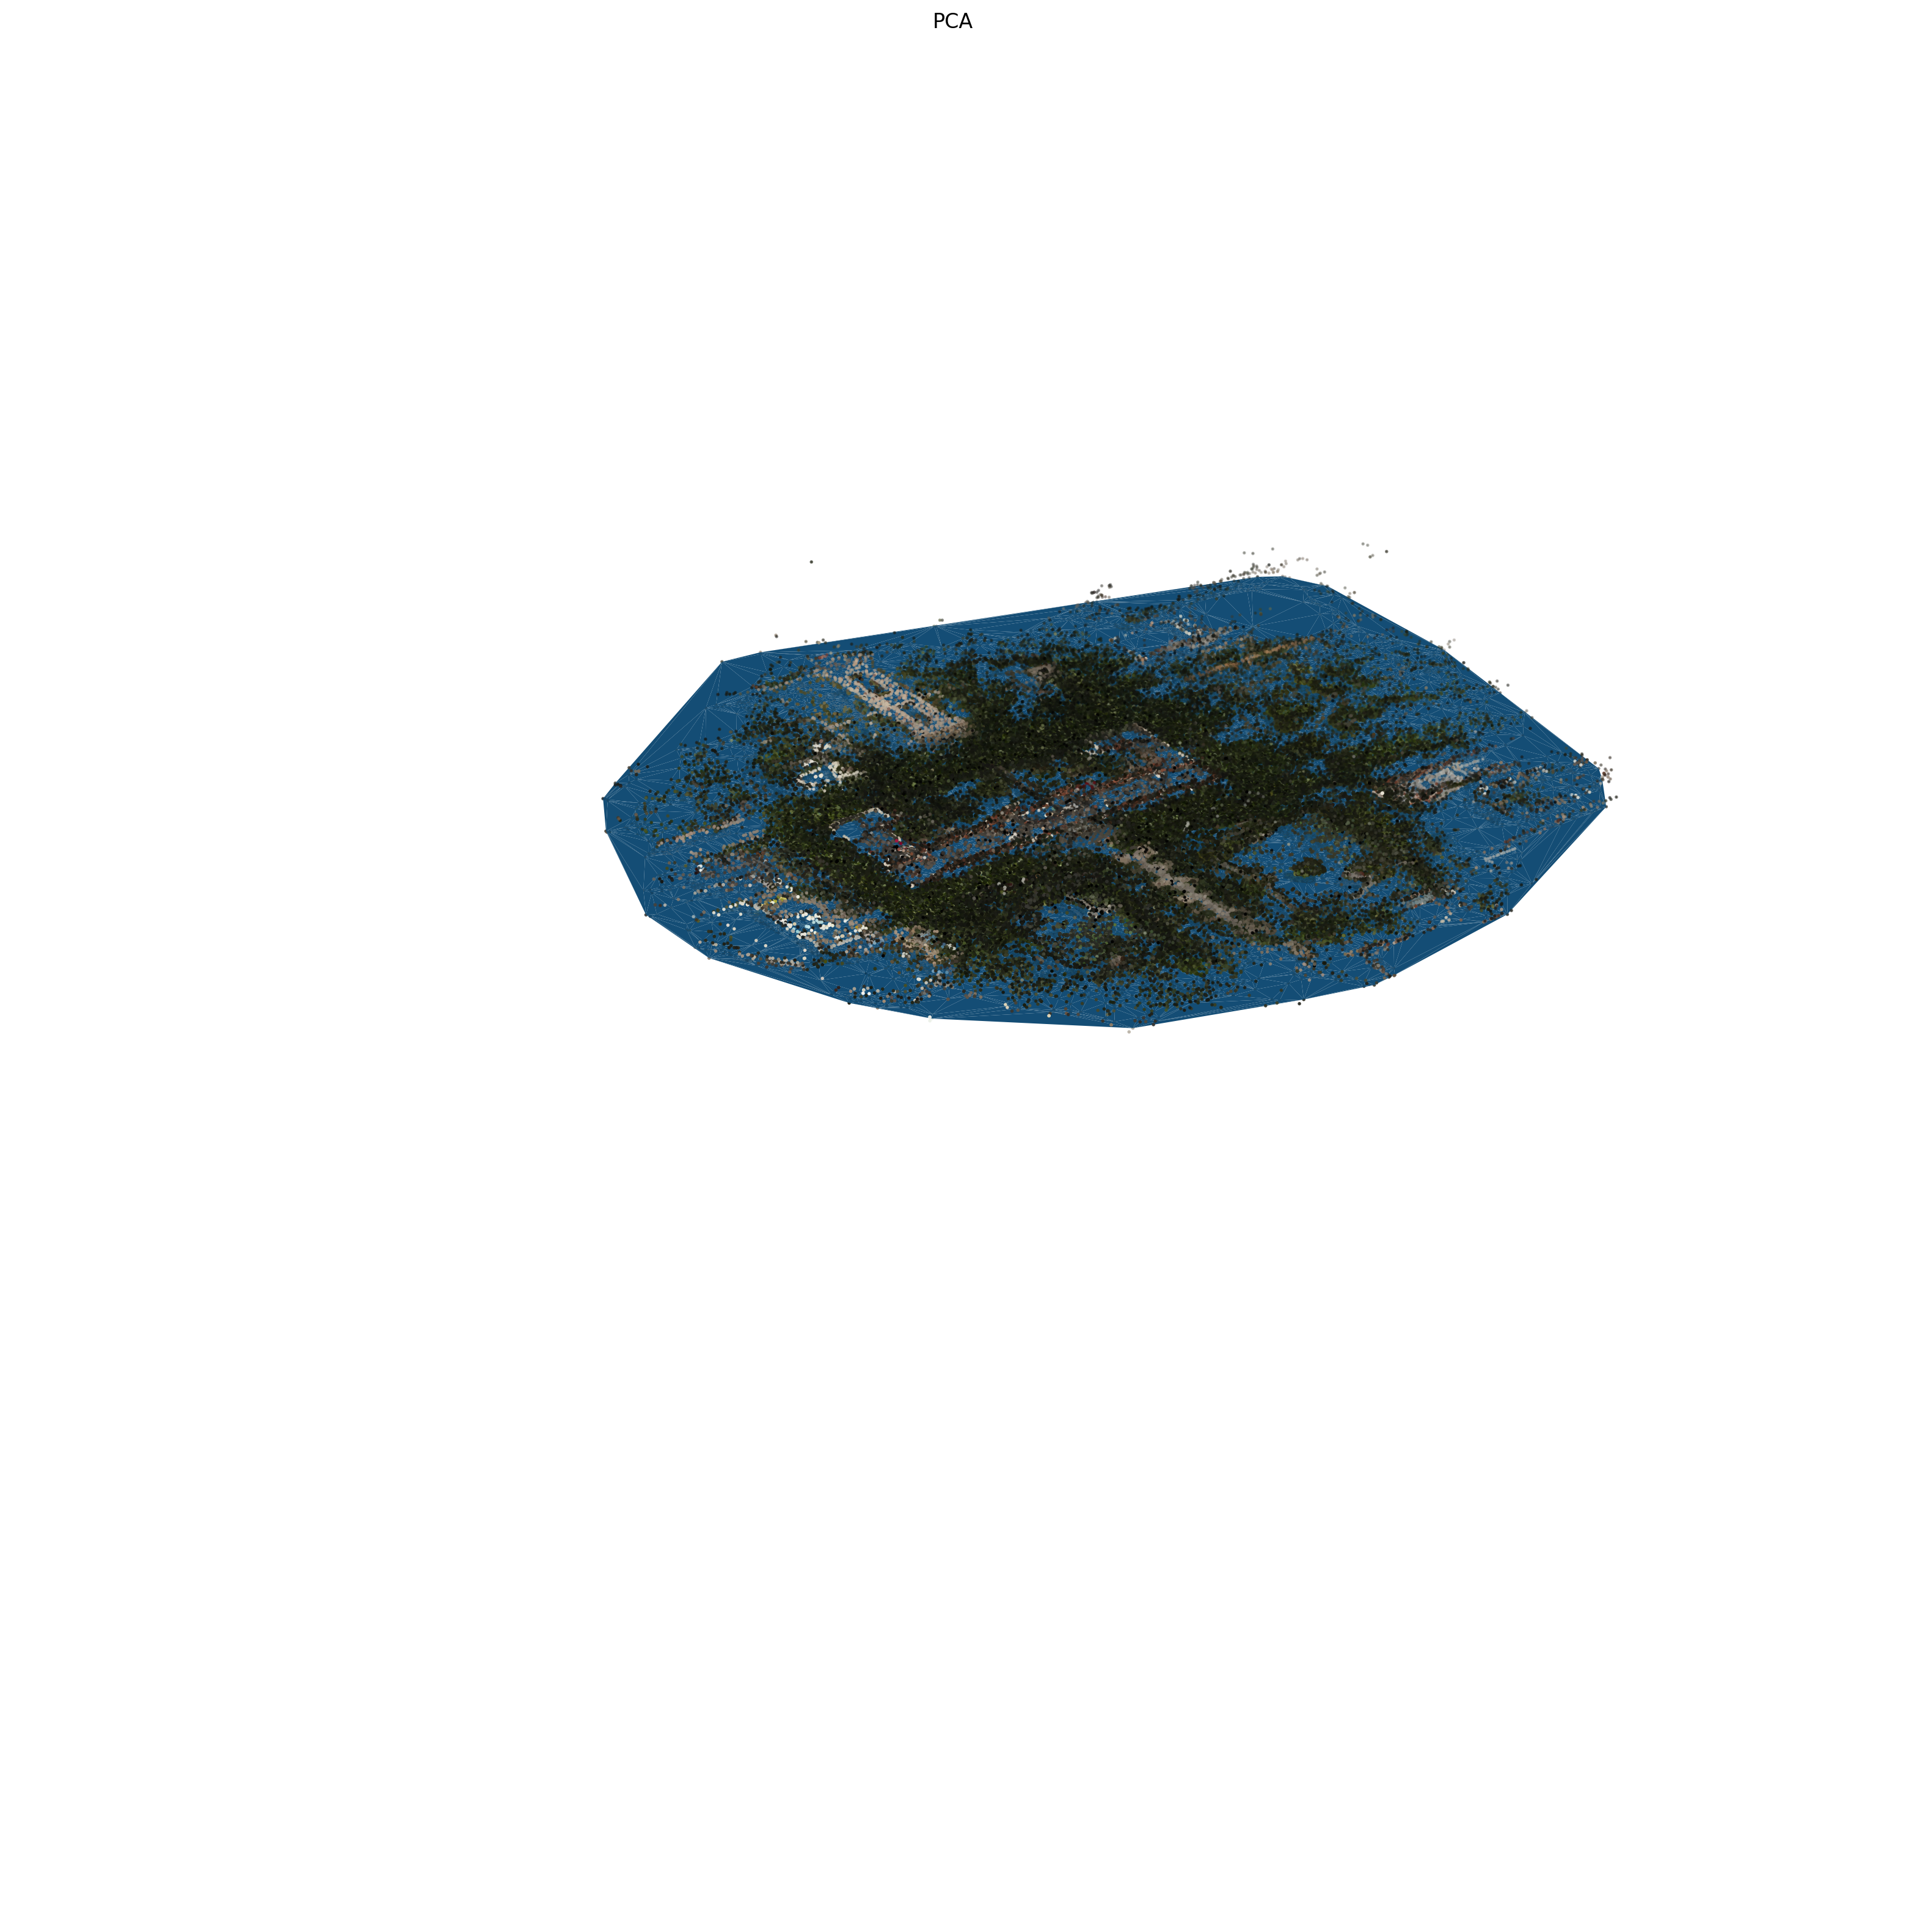

In [87]:
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

Color = data[:, 3:6] / 255.0  # 归一化到 [0, 1]
X = data[:,0]
Y = data[:,1]
Z = data[:,2]

X_ = data_[:,0]
Y_ = data_[:,1]
Z_ = data_[:,2]
points_2d = np.column_stack((X_, Y_, Z_))
# for i in range(35,55):
azim_increment = 5
for i in range(-10,50, azim_increment):
    #让图转起来
    import IPython
    IPython.display.clear_output(wait=True)

    # fig = plt.figure(1,(6,4),dpi = 500)
    fig = plt.figure(1,(20,20),dpi = 200)
    # ax = fig.gca(projection='3d')
    ax = fig.add_subplot(projection='3d')
    plt.cla()
    #绘制散点
    ax.scatter(X,Y,Z,s=1, c=rgb_colors, label='origin data')
    
    ax.scatter(X_,Y_,Z_,s=1, c=rgb_colors,label='restructured data')
    ax.plot_trisurf(X_, Y_, Z_)

    # #绘制xyz轴
    # ax.plot([0,0],[0,0],[-10,10],c = 'black',linewidth = 0.8)
    # ax.plot([0,0],[-10,10],[0,0],c = 'black',linewidth = 0.8)
    # ax.plot([-10,10],[0,0],[0,0],c = 'black',linewidth = 0.8)
    
    # 关闭坐标轴
    ax.axis('off')
    
    ax.view_init(elev=i, azim=45)
    plt.xlim(-X.max(), X.max())
    plt.ylim(-Y.max(), Y.max())
    ax.set_zlim(-Z.max(),Z.max())
    plt.title('PCA')
    # 如果目录不存在，则创建它
    save_dir = 'data/pca/svg_45'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    # plt.savefig(f'data/pca/svg_45/animation_frame_{i}.svg', format='svg')  # 将图保存为 PNG 格式的文件
    plt.savefig(f'data/pca/svg_45/animation_frame_{i}.svg', format='svg')  # 将图保存为 PNG 格式的文件
    plt.savefig(f'data/pca/svg_45/animation_frame_{i}.png')  # 将图保存为 PNG 格式的文件
    plt.show()
    

In [25]:
import os
import numpy as np
from mayavi import mlab

# 示例数据，假设有 X、Y、Z 和 rgb_colors 变量
# 请根据实际情况替换为你的数据
X = data[:, 0]
Y = data[:, 1]
Z = data[:, 2]

X_ = data_[:, 0]
Y_ = data_[:, 1]
Z_ = data_[:, 2]

# 设置每次迭代的视角变化量
azim_increment = 30

# 如果目录不存在，则创建它
save_dir = 'data/pca/mayavi'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 让图转起来
import IPython
IPython.display.clear_output(wait=True)

# 创建 Mayavi 图形对象
fig = mlab.figure(size=(600, 400), bgcolor=(1, 1, 1))

# 绘制3D矢量场
quiver = mlab.quiver3d(X, Y, Z, rgb_colors[:, 0], rgb_colors[:, 1], rgb_colors[:, 2], scale_factor=0.1, mode='2ddash')

# 关闭坐标轴
mlab.axes(x_axis_visibility=False, y_axis_visibility=False, z_axis_visibility=False)

# 设置视角
mlab.view(azimuth=i, elevation=30)

# 保存图形到文件
# mlab.savefig(f'{save_dir}/animation_frame_{i}.png', figure=fig)

# 显示图形
mlab.show()
    
